# Fundamentos Machine Learning 🧠

## Módulo 1

In [ ]:
# Importação das bibliotecas
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

iris = load_iris ()
x = iris.data #[n_amostras, n_features]
y = iris.target #Vetor de alvo do [n_amostras]

print("Forma das amostras (x): ", x.shape[0])
print("Forma das características (x): ", x.shape[1])
print("Forma do alvo (y): ", y.shape)

Forma das amostras (x):  150
Forma das características (x):  4
Forma do alvo (y):  (150,)


Treino e teste ✔

In [ ]:
#Particionar os dados para treinamento
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print("Tamanho do conjunto do treinamento: ", x_train.shape)
print("Tamanho do conjunto de teste: ", x_test.shape)


Tamanho do conjunto do treinamento:  (105, 4)
Tamanho do conjunto de teste:  (45, 4)


Árvore de decisão 🌳

In [ ]:
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(x_test, y_test)
print(tree_model.get_params())

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'random_state': 42, 'splitter': 'best'}


Predicção

In [ ]:
y_tree_predict = tree_model.predict(x_test)
accuracy_tree = accuracy_score(y_test, y_tree_predict)
print("Acurácia da árvore de decisão: ", accuracy_tree)

Acurácia da árvore de decisão:  1.0


Criação e Treinamento do Modelo KN

In [ ]:
# Criar e treinar o modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(x_train, y_train)

# Fazer previsões
y_knn_predict = knn_model.predict(x_test)

# Calcular a acurácia
accuracy_knn = accuracy_score(y_test, y_knn_predict)
print("Acurácia do KNN: ", accuracy_knn)


Acurácia do KNN:  1.0


In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

knn_model = KNeighborsClassifier()
knn_model.fit(x_train_scaled, y_train)

y_pred_knn = knn_model.predict(x_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'KNN Accuracy: {accuracy_knn:2f}')

KNN Accuracy: 1.000000


## Módulo 2 - validação

In [ ]:
# Importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, StratifiedKFold, ShuffleSplit
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

# 2. Definição dos dados
data = {
    'Nome': ['Charmander', 'Squirtle', 'Growlithe', 'Psyduck', 'Vulpix', 'Poliwag',
             'Magmar', 'Tentacool', 'Cyndaquil', 'Totodile', 'Torchic', 'Mudkip',
             'Chimchar', 'Piplup', 'Fennekin', 'Froakie'],
    'Tipo': ['Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água', 'Fogo', 'Água',
             'Fogo', 'Água', 'Fogo', 'Água'],
    'Attack': [52, 48, 70, 52, 50, 50, 95, 40, 49, 65, 60, 70, 58, 51, 61, 56],
    'Speed': [65, 43, 60, 55, 65, 90, 93, 70, 65, 43, 45, 40, 61, 50, 72, 71]
}
# 3. Criando DataFrame
df_pokemon = pd.DataFrame(data)

# 4. Codificação dos tipos: Fogo = 1, Água = 0
le = LabelEncoder()
df_pokemon['TipoNum'] = le.fit_transform(df_pokemon['Tipo'])
# Nota: LabelEncoder atribui em ordem alfabética. 'Água' se torna 0, 'Fogo' se torna 1.

# 5. Separação de features (X) e target (y)
X_poke = df_pokemon[['Attack', 'Speed']].values
y_poke = df_pokemon['TipoNum'].values

df_pokemon.head()

,Nome,Tipo,Attack,Speed,TipoNum
0,Charmander,Fogo,52,65,0
1,Squirtle,Água,48,43,1
2,Growlithe,Fogo,70,60,0
3,Psyduck,Água,52,55,1
4,Vulpix,Fogo,50,65,0


Treino|Teste Hold-out

Função para visualização.

In [ ]:
def plot_model(model, X, y, X_train, y_train, X_test, y_test, title):
    # Geração da grade para a região de decisão
    x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
    y_min, y_max = X[:, 1].min() - 5, X[:, 1].max() + 5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot da figura
    plt.figure(figsize=(10, 6))
    # 'Água' (0) será azul, 'Fogo' (1) será vermelho
    cmap_background = ListedColormap(['#87CEFA', '#FFB6C1']) # Azul claro e Vermelho claro
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_background)

    # Mapear os pontos de dados
    cmap_points = ListedColormap(['blue', 'red'])
    # Pontos de Treino (círculos)
    scatter_train = plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_points, edgecolor='k', marker='o', s=100, label='Treino')
    # Pontos de Teste (quadrados)
    scatter_test = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_points, edgecolor='k', marker='s', s=100, label='Teste')

    # Legenda
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Água (Treino)', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Fogo (Treino)', markerfacecolor='red', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Água (Teste)', markerfacecolor='blue', markersize=10),
        Line2D([0], [0], marker='s', color='w', label='Fogo (Teste)', markerfacecolor='red', markersize=10)
    ]
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(title)
    plt.xlabel('Attack')
    plt.ylabel('Speed')
    plt.grid(True)
    plt.show()

    print(f'Acurácia Treino: {model.score(X_train, y_train):.2f}')
    print(f'Acurácia Teste: {model.score(X_test, y_test):.2f}')

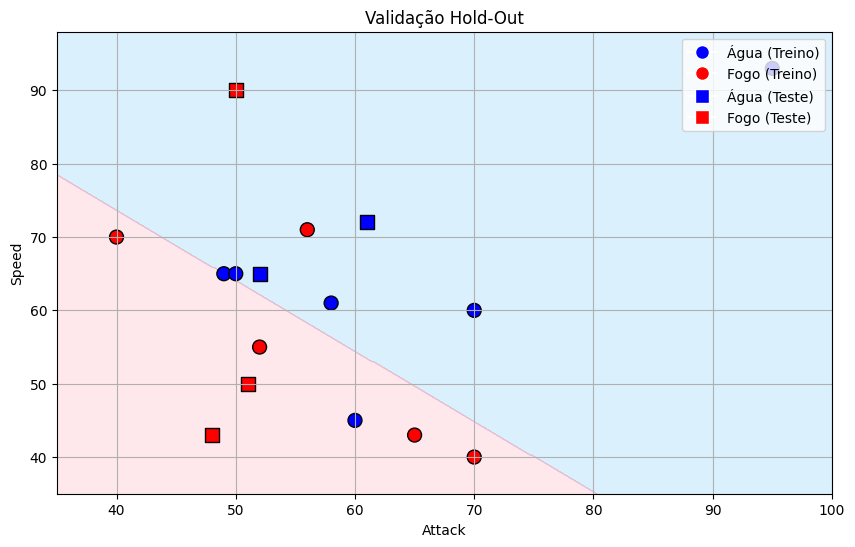

Acurácia Treino: 0.82
Acurácia Teste: 0.80


In [ ]:

# 6. Separação padrão para treino/teste (Hold-Out)
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_poke, y_poke, test_size=0.3, random_state=42)
model_holdout = LogisticRegression()
model_holdout.fit(X_train_h, y_train_h)
plot_model(model_holdout, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Validação Hold-Out')

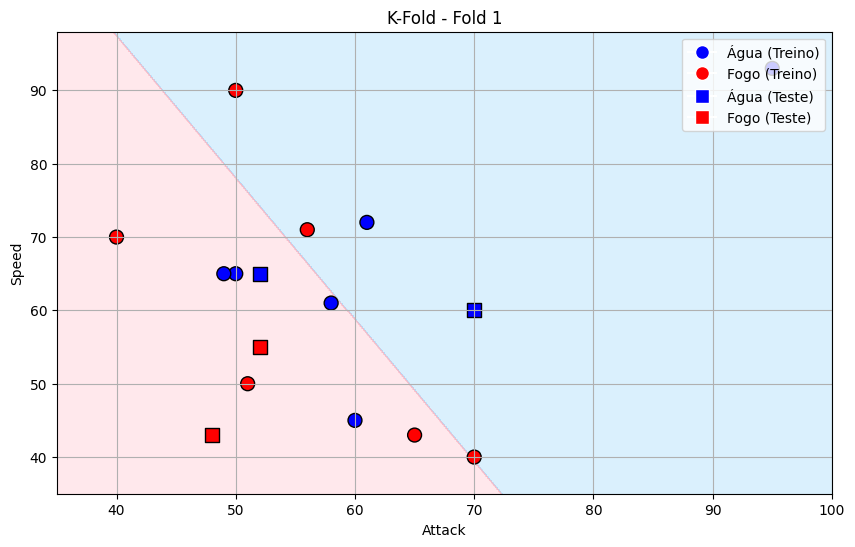

Acurácia Treino: 0.42
Acurácia Teste: 0.75


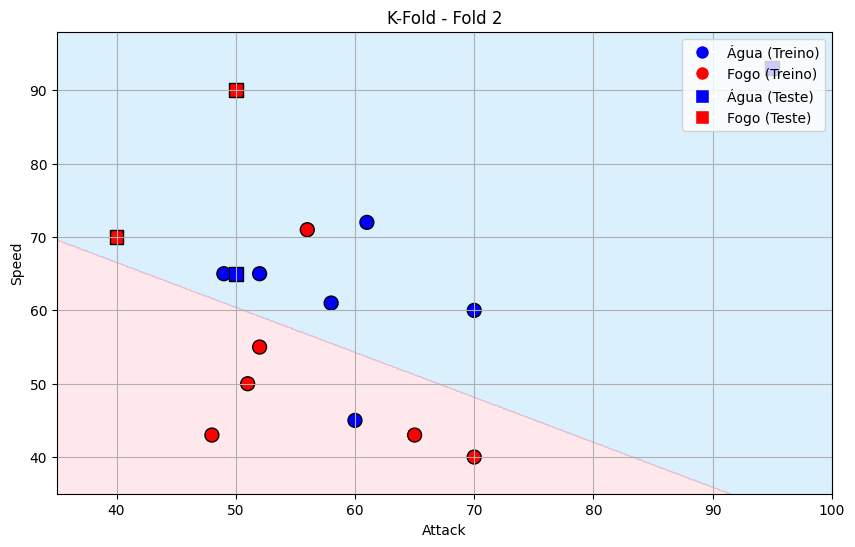

Acurácia Treino: 0.83
Acurácia Teste: 0.50


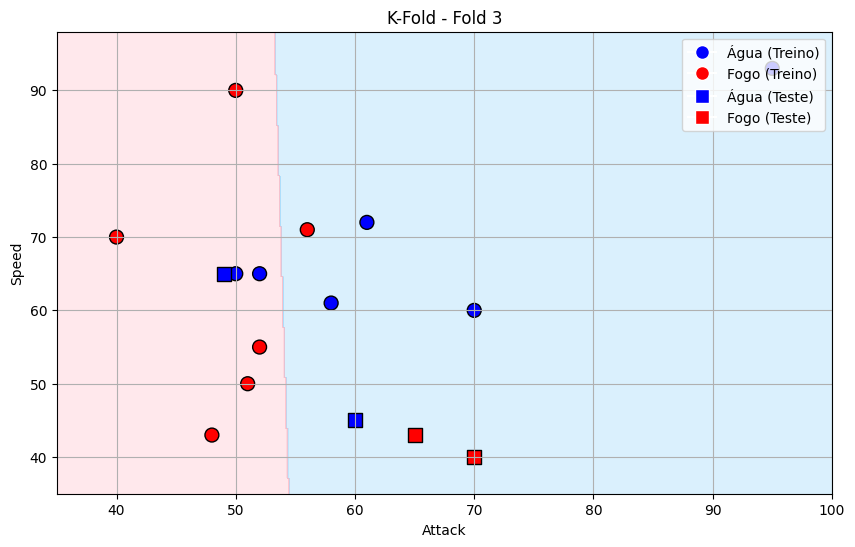

Acurácia Treino: 0.75
Acurácia Teste: 0.25


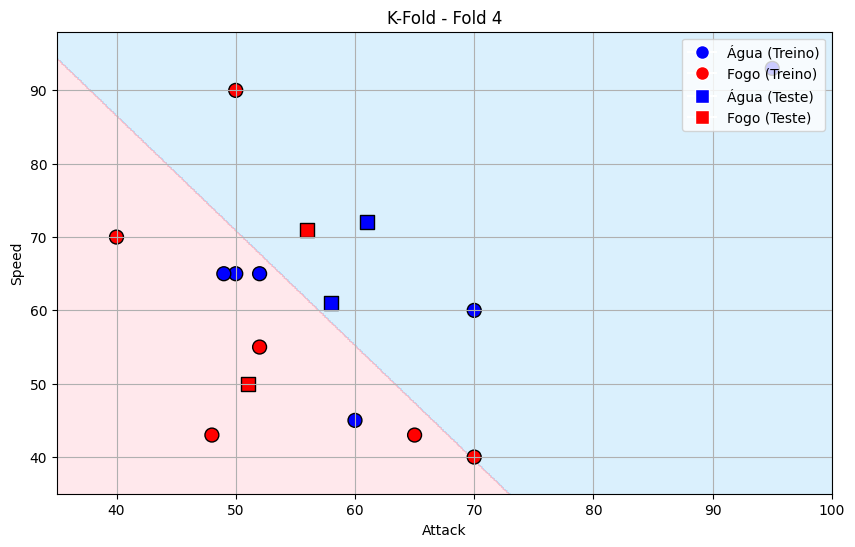

Acurácia Treino: 0.50
Acurácia Teste: 0.75


In [ ]:

# 8. K-Fold
kf = KFold(n_splits=4)
for fold, (train_idx, test_idx) in enumerate(kf.split(X_poke)):
    model_kf = LogisticRegression()
    model_kf.fit(X_poke[train_idx], y_poke[train_idx])
    plot_model(model_kf, X_poke, y_poke, X_poke[train_idx], y_poke[train_idx], X_poke[test_idx], y_poke[test_idx], f'K-Fold - Fold {fold+1}')

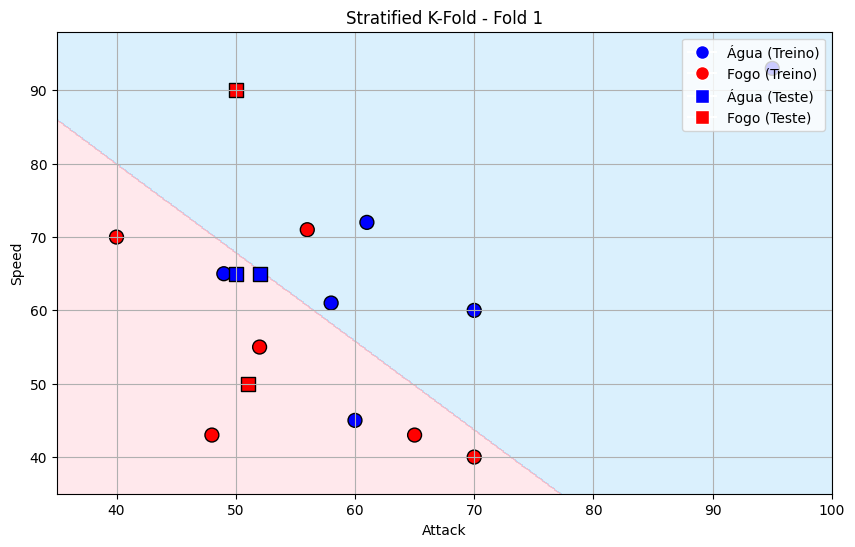

Acurácia Treino: 0.75
Acurácia Teste: 0.25


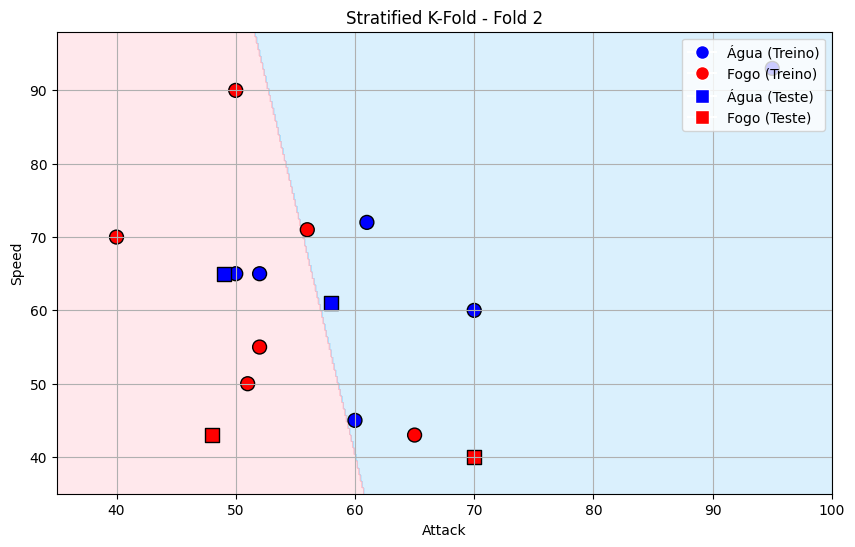

Acurácia Treino: 0.67
Acurácia Teste: 0.50


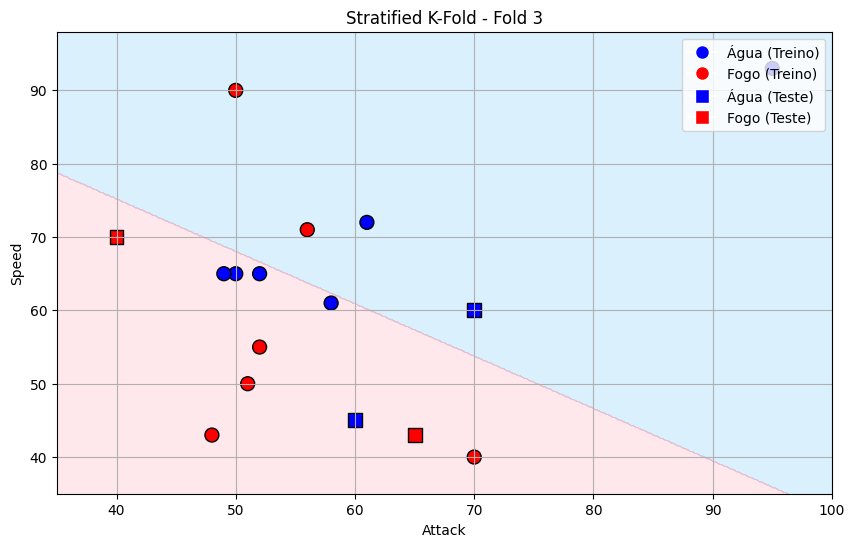

Acurácia Treino: 0.50
Acurácia Teste: 0.75


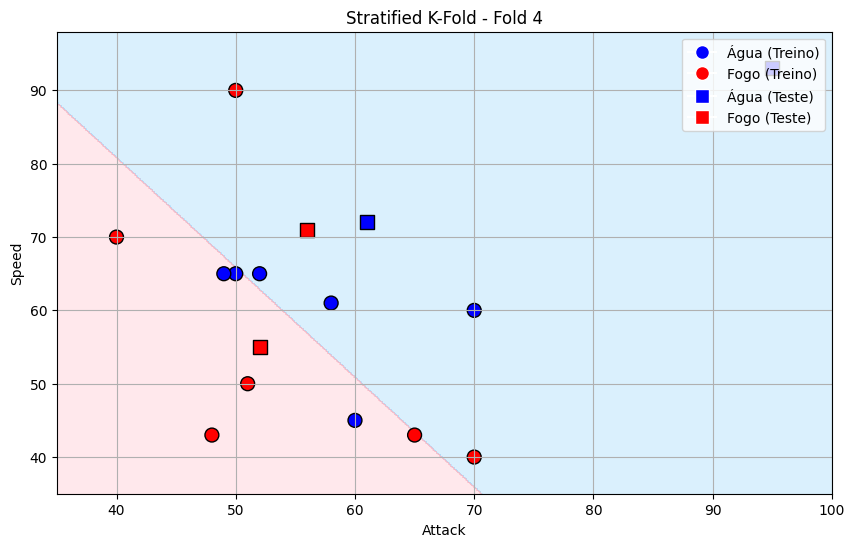

Acurácia Treino: 0.58
Acurácia Teste: 0.75


In [ ]:
# 10. Stratified K-Fold
skf = StratifiedKFold(n_splits=4, shuffle=True, random_state=42)
for fold, (train_idx, test_idx) in enumerate(skf.split(X_poke, y_poke)):
    model_skf = LogisticRegression()
    model_skf.fit(X_poke[train_idx], y_poke[train_idx])
    plot_model(model_skf, X_poke, y_poke, X_poke[train_idx], y_poke[train_idx], X_poke[test_idx], y_poke[test_idx], f'Stratified K-Fold - Fold {fold+1}')

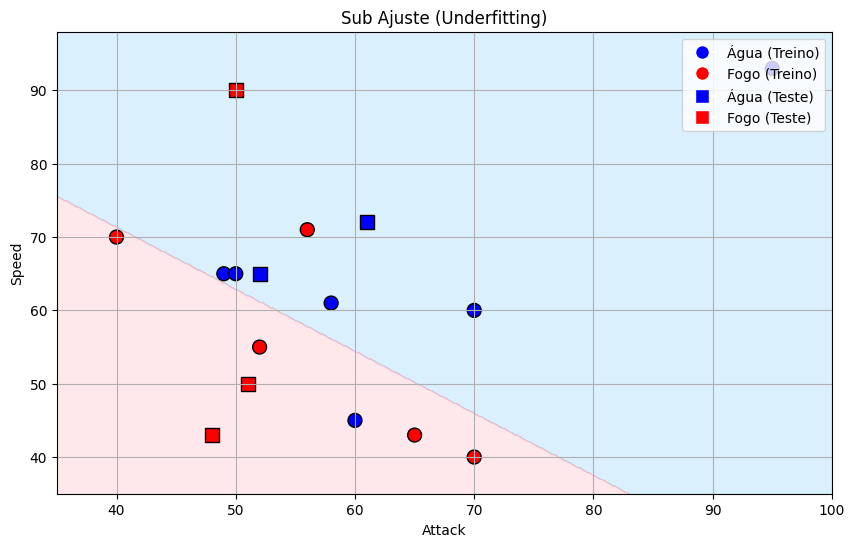

Acurácia Treino: 0.82
Acurácia Teste: 0.80


In [ ]:

# 12. Sub Ajuste (Modelo muito simples)
model_sub = LogisticRegression(C=0.01)  # C pequeno torna o modelo menos flexível
model_sub.fit(X_train_h, y_train_h)
plot_model(model_sub, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Sub Ajuste (Underfitting)')

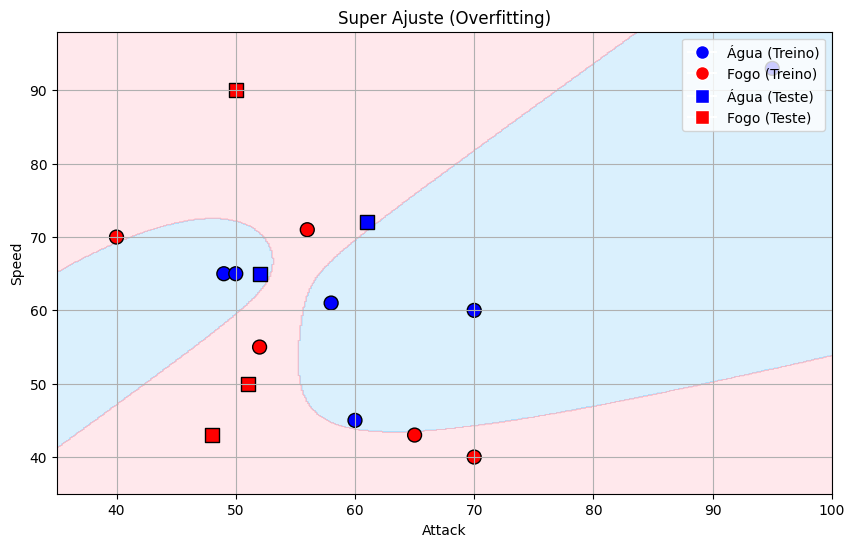

Acurácia Treino: 1.00
Acurácia Teste: 0.80


In [ ]:
# 13. Super Ajuste (Modelo muito complexo)
model_super = make_pipeline(PolynomialFeatures(degree=4), LogisticRegression(max_iter=1000))
model_super.fit(X_train_h, y_train_h)
plot_model(model_super, X_poke, y_poke, X_train_h, y_train_h, X_test_h, y_test_h, 'Super Ajuste (Overfitting)')